<a href="https://colab.research.google.com/github/anjali-ojha/deep-learning/blob/main/assignment/assignment-2/Anjali_Ojha_HW_2_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homwwork-2 - Pytorch

## Use the code provided in demo 02 to complete this assignment.

## Step 1. Follow along with the tutorial to gain an understanding of the process.

In [20]:
%matplotlib inline

In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Step 2. In a new .ipynb notebook, reproduce the results utilizing the "QMNIST" dataset

In [22]:
# Load Fashion MNIST dataset and preprocess
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.QMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.QMNIST(root='./data', train=False, download=True, transform=transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [23]:
def show_data(data):
    """
    This method shows some sample data with labels
    """
    labels_map = {
        0: "Zero",
        1: "One",
        2: "Two",
        3: "Three",
        4: "Four",
        5: "Five",
        6: "Six",
        7: "Seven",
        8: "Eight",
        9: "Nine",
    }
    figure = plt.figure(figsize=(8, 8))
    cols, rows = 3, 3
    for i in range(1, cols * rows + 1):
        sample_idx = torch.randint(len(data), size=(1,)).item()
        img, label = data[sample_idx]
        figure.add_subplot(rows, cols, i)
        plt.title(labels_map[label])
        plt.axis("off")
        plt.imshow(img.squeeze(), cmap="gray")
    plt.show()

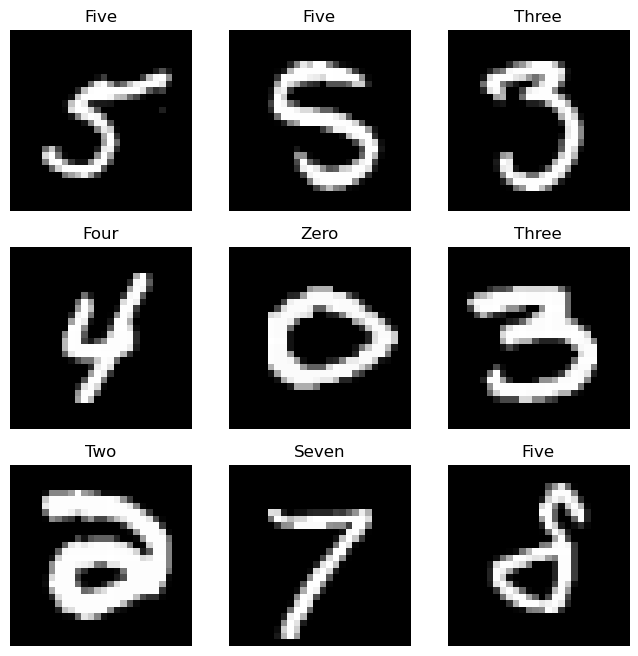

In [24]:
show_data(train_dataset)

In [25]:
def evaluation(model, test_data):
    """
    Evaluate the model with test data
    """
    model.eval()
    predictions = []
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_data:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            predictions.extend(predicted.numpy())  # Store predictions
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    return (correct / total * 100), predictions # correct, total, predictions


In [26]:
def training(train_loader, num_epochs, model, criterion, optimizer, verbose=0):
    """
    This method will train the tensorflow Neural Network Model
    It takes the parameters like -
        train_loader = training data
        model = base model
        epocs  = number of iteration the moedls will be trained
        optmizer =  'adam' or 'SGD'
        criterion = which used to evaluate the model
        verbose = to control logs
    """
    running_loss = 0.0
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        if verbose == 0:  # print every 100 mini-batches
            print(f'Epoch {epoch + 1} ------------------------')
        for i, data in enumerate(train_loader, 0):
            inputs, labels = data
            optimizer.zero_grad()
            outputs = model(inputs)
            labels_onehot = nn.functional.one_hot(labels, num_classes=10).float()  # Convert labels to one-hot encoding
            loss = criterion(outputs, labels_onehot)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            if verbose == 0 and i % 100 == 99:  # print every 100 mini-batches
                print(f'\tEpoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
                running_loss = 0.0
        if verbose == 1:
            print(f'Epoch {epoch + 1}, Loss: {running_loss / 100}')
    
    trainAccuracy, preds = evaluation(model=model, test_data=train_loader)
    print(f'Finished Training with loss = {running_loss / 100 :.6}')
    print(f'Accuracy on Train Data  = {trainAccuracy :.5}%')
    return model, running_loss/100, trainAccuracy

In [27]:
def show_sample_result(model, data, predictions):
    """
    Show A sample test data and what is the actual and predicted labels
    """
    image, label = data
    image = image.view(28, 28)
    image_numpy = image.numpy()
    plt.imshow(image_numpy, cmap='gray')
    plt.title(f'Predicted Label: {predictions}, Actual Label: {label}')
    plt.axis('off')
    plt.show()

## Step 3. Report on the results in terms of prediction accuracy on the train and test datasets

Epoch 1 ------------------------
	Epoch 1, Batch 100, Loss: 1.000454624593258
	Epoch 1, Batch 200, Loss: 0.43542961567640304
	Epoch 1, Batch 300, Loss: 0.35746832147240637
	Epoch 1, Batch 400, Loss: 0.340984865128994
	Epoch 1, Batch 500, Loss: 0.3294805931299925
	Epoch 1, Batch 600, Loss: 0.29666999630630014
	Epoch 1, Batch 700, Loss: 0.27837999127805235
	Epoch 1, Batch 800, Loss: 0.27032395370304585
	Epoch 1, Batch 900, Loss: 0.24011774644255637
Epoch 2 ------------------------
	Epoch 2, Batch 100, Loss: 0.19991562977433205
	Epoch 2, Batch 200, Loss: 0.19676196720451117
	Epoch 2, Batch 300, Loss: 0.1950448302552104
	Epoch 2, Batch 400, Loss: 0.1809224071353674
	Epoch 2, Batch 500, Loss: 0.20118116289377214
	Epoch 2, Batch 600, Loss: 0.17440020006150006
	Epoch 2, Batch 700, Loss: 0.16763857897371054
	Epoch 2, Batch 800, Loss: 0.17084313981235028
	Epoch 2, Batch 900, Loss: 0.17805375972762705
Epoch 3 ------------------------
	Epoch 3, Batch 100, Loss: 0.1334886073321104
	Epoch 3, Batch 

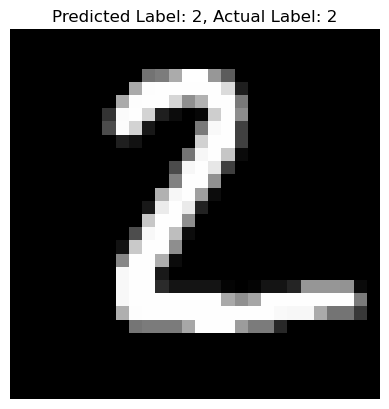

In [32]:
"""
Base Model Architecture
"""
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x


model = MLP()
model, _, _ = training(train_loader = train_loader,
                    num_epochs=5,
                    model=model,
                    criterion = nn.CrossEntropyLoss(),
                    optimizer = optim.Adam(model.parameters(), lr=0.001))

testAccuracy, predictions = evaluation(model=model, test_data=test_loader)
print(f'Accuracy on Test Data: {testAccuracy :.5}%')
show_sample_result(model, test_dataset[1], predictions[1])

## Step 4. Choose one of the proposed modifications below:


## HYPOTHESIS - as we are addine either new layer or make a layer wide, it can impact the performance. The Complex neural network can easily overfit the training data, but if its tuned peroperly it can increase the performance.



### 1 - Add another Dense layer of 128 nodes

Epoch 1 ------------------------
	Epoch 1, Batch 100, Loss: 1.152290209531784
	Epoch 1, Batch 200, Loss: 0.46827548831701277
	Epoch 1, Batch 300, Loss: 0.37599770426750184
	Epoch 1, Batch 400, Loss: 0.3557242637127638
	Epoch 1, Batch 500, Loss: 0.3407961792498827
	Epoch 1, Batch 600, Loss: 0.29877202823758126
	Epoch 1, Batch 700, Loss: 0.2843075033277273
	Epoch 1, Batch 800, Loss: 0.25980622559785843
	Epoch 1, Batch 900, Loss: 0.2472558595240116
Epoch 2 ------------------------
	Epoch 2, Batch 100, Loss: 0.21509181842207908
	Epoch 2, Batch 200, Loss: 0.2181343797594309
	Epoch 2, Batch 300, Loss: 0.19948672384023666
	Epoch 2, Batch 400, Loss: 0.17718048866838218
	Epoch 2, Batch 500, Loss: 0.18285433650016786
	Epoch 2, Batch 600, Loss: 0.17653312552720307
	Epoch 2, Batch 700, Loss: 0.1707425344362855
	Epoch 2, Batch 800, Loss: 0.1681705255433917
	Epoch 2, Batch 900, Loss: 0.17401967862620948
Epoch 3 ------------------------
	Epoch 3, Batch 100, Loss: 0.14129931112751365
	Epoch 3, Batch 2

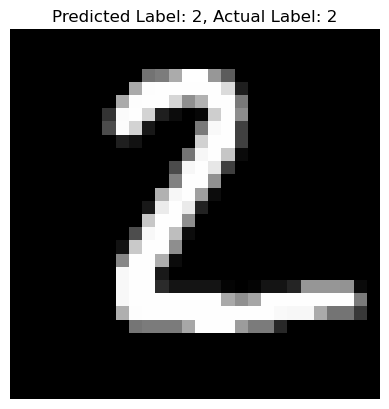

In [33]:
"""
Added a extra layer in the model
"""
class MLP_New_Layer(nn.Module):
    def __init__(self):
        super(MLP_New_Layer, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Initialize the neural network
model_new_layer = MLP_New_Layer()

model_new_layer, _, _ = training(train_loader=train_loader,
                                  num_epochs=5,
                                  model=model_new_layer,
                                  criterion = nn.CrossEntropyLoss(),
                                  optimizer = optim.Adam(model_new_layer.parameters(), lr=0.001))

testAccuracy_new_layer, predictions_new_layer = evaluation(model=model_new_layer, test_data=test_loader)
print(f'Accuracy on Test Data: {testAccuracy_new_layer :.5}%')
show_sample_result(model_new_layer, test_dataset[1], predictions_new_layer[1])

### Increase the current number of nodes in the layer to 256

Epoch 1 ------------------------
	Epoch 1, Batch 100, Loss: 0.9022713971138
	Epoch 1, Batch 200, Loss: 0.42505830064415934
	Epoch 1, Batch 300, Loss: 0.3561579948663712
	Epoch 1, Batch 400, Loss: 0.32565719172358515
	Epoch 1, Batch 500, Loss: 0.2979104413092136
	Epoch 1, Batch 600, Loss: 0.24991220362484456
	Epoch 1, Batch 700, Loss: 0.27215307384729387
	Epoch 1, Batch 800, Loss: 0.2273856132477522
	Epoch 1, Batch 900, Loss: 0.20497259646654128
Epoch 2 ------------------------
	Epoch 2, Batch 100, Loss: 0.19849265541881322
	Epoch 2, Batch 200, Loss: 0.1756110398285091
	Epoch 2, Batch 300, Loss: 0.1793565194681287
	Epoch 2, Batch 400, Loss: 0.17111580014228822
	Epoch 2, Batch 500, Loss: 0.154327141828835
	Epoch 2, Batch 600, Loss: 0.15810294538736344
	Epoch 2, Batch 700, Loss: 0.15735590597614646
	Epoch 2, Batch 800, Loss: 0.14352401953190566
	Epoch 2, Batch 900, Loss: 0.14373456517234445
Epoch 3 ------------------------
	Epoch 3, Batch 100, Loss: 0.11016182248480617
	Epoch 3, Batch 200

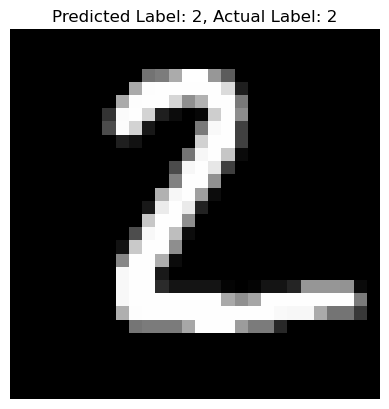

In [34]:
"""
Make a exisitng layer wide
"""
class MLP_Wide_Layer(nn.Module):
    def __init__(self):
        super(MLP_Wide_Layer, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)
        self.fc2 = nn.Linear(256, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the neural network
model_wide_layer = MLP_Wide_Layer()
model_wide_layer, _, _ = training(train_loader=train_loader,
                               num_epochs = 5,
                               model = model_wide_layer,
                               criterion = nn.CrossEntropyLoss(),
                               optimizer = optim.Adam(model_wide_layer.parameters(), lr=0.001))


testAccuracy_wide_layer, predictions_wide_layer = evaluation(model=model_wide_layer, test_data=test_loader)
print(f'Accuracy on Test Data: {testAccuracy_wide_layer : .5}%')
show_sample_result(model_wide_layer, test_dataset[1], predictions_wide_layer[1])

## Step 6. Report on the results of the modified model and if it matches your hypothesis

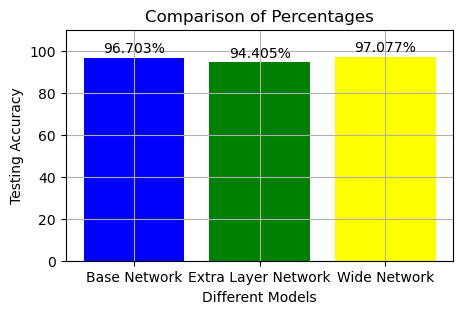

In [35]:
"""
Performance Comparisions for the differnet models
"""

labels = ['Base Network', 'Extra Layer Network', 'Wide Network']

values = [testAccuracy, testAccuracy_new_layer, testAccuracy_wide_layer]

plt.figure(figsize=(5, 3))
bars = plt.bar(labels, values, color=['blue', 'green', 'yellow'])

for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{value:.3f}%', ha='center', va='bottom')

plt.ylim(0, 110)
plt.title('Comparison of Percentages')
plt.xlabel('Different Models')
plt.ylabel('Testing Accuracy')
plt.grid(True)
plt.show()

## Observation

    - From the bar chart its clear that all three models works great and achieving more than 92% test accuracy.
    - But we can also see that wide layer models works with best accuracy, but the  model with extra layer performs worse than the base model hinting towards the overfitting.
    - If we rerun the training it will change, so we need more epochs  for any conclusion.

## Step 7. Experiment with different optimizers, loss functions, dropout, and activation functions, and observe the change in performance as you tune these hyperparameters.

In [13]:
"""
Defining a model class which have a variable dropout and activation functions.
So that we can measure the performance for each of the model
"""
class MLP_Flex(nn.Module):
    def __init__(self, activation_function, dropout):
        super(MLP_Flex, self).__init__()
        self.activation_function = activation_function
        self.dropout = dropout
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        self.dropout_fuction = nn.Dropout(p=dropout)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.activation_function(self.fc1(x))
        x = self.dropout_fuction(x)
        x = self.activation_function(self.fc2(x))
        x = self.dropout_fuction(x)
        x = self.fc3(x)
        return x


In [14]:
optimizers = [optim.Adam, optim.SGD, optim.RMSprop]
loss_functions = [nn.MSELoss(), nn.CrossEntropyLoss(), ]
dropouts = [0.0, 0.2, 0.5]
activation_functions = [nn.ReLU(), nn.Sigmoid()]

result = {"optimizer":[], "loss": [], "dropout":[], "activation": [],
          "training_loss": [], "test_accuracy": [], "train_accuracy": [], "name": []}

for optimizer in optimizers:
    for loss_function in loss_functions:
        for dropout in dropouts:
            for activation_function in activation_functions:

                result["optimizer"].append(optimizer.__name__)
                result["loss"].append(loss_function.__class__.__name__)
                result["activation"].append(activation_function.__class__.__name__)
                result["dropout"].append(dropout)

                name = []
                for key in ["optimizer", "loss", "activation", "dropout"]:
                    name.append(f'{key}={result[key][-1]}')

                result["name"].append(",".join(name))

                print(f'''\n\tTraining {result["name"][-1]}''')

                model = MLP_Flex(activation_function=activation_function, dropout=dropout)
                model, training_loss, train_accuracy = training(train_loader = train_loader,
                                                                num_epochs = 5,
                                                                model = model,
                                                                criterion = loss_function,
                                                                optimizer = optimizer(model.parameters(), lr=0.001),
                                                                verbose = 2)
                
                result["training_loss"].append(training_loss)
                result["train_accuracy"].append(train_accuracy)
                
                test_accuracy, predictions = evaluation(model=model, test_data=test_loader)
                print(f'Accuracy on Test Data: {test_accuracy: .5}%')
                result["test_accuracy"].append(test_accuracy)



	Training optimizer=Adam,loss=MSELoss,activation=ReLU,dropout=0.0
Finished Training with loss = 0.0600105
Accuracy on Train Data  = 97.318%
Accuracy on Test Data:  96.348%

	Training optimizer=Adam,loss=MSELoss,activation=Sigmoid,dropout=0.0
Finished Training with loss = 0.086968
Accuracy on Train Data  = 96.525%
Accuracy on Test Data:  95.707%

	Training optimizer=Adam,loss=MSELoss,activation=ReLU,dropout=0.2
Finished Training with loss = 0.149101
Accuracy on Train Data  = 95.755%
Accuracy on Test Data:  95.215%

	Training optimizer=Adam,loss=MSELoss,activation=Sigmoid,dropout=0.2
Finished Training with loss = 0.130053
Accuracy on Train Data  = 95.363%
Accuracy on Test Data:  94.87%

	Training optimizer=Adam,loss=MSELoss,activation=ReLU,dropout=0.5
Finished Training with loss = 0.481716
Accuracy on Train Data  = 90.517%
Accuracy on Test Data:  90.313%

	Training optimizer=Adam,loss=MSELoss,activation=Sigmoid,dropout=0.5
Finished Training with loss = 0.245462
Accuracy on Train Data  =

In [15]:
result_df = pd.DataFrame(result)
result_df

,optimizer,loss,dropout,activation,training_loss,test_accuracy,train_accuracy,name
0,Adam,MSELoss,0.0,ReLU,0.060011,96.348333,97.318333,"optimizer=Adam,loss=MSELoss,activation=ReLU,dr..."
1,Adam,MSELoss,0.0,Sigmoid,0.086968,95.706667,96.525000,"optimizer=Adam,loss=MSELoss,activation=Sigmoid..."
2,Adam,MSELoss,0.2,ReLU,0.149101,95.215000,95.755000,"optimizer=Adam,loss=MSELoss,activation=ReLU,dr..."
3,Adam,MSELoss,0.2,Sigmoid,0.130053,94.870000,95.363333,"optimizer=Adam,loss=MSELoss,activation=Sigmoid..."
4,Adam,MSELoss,0.5,ReLU,0.481716,90.313333,90.516667,"optimizer=Adam,loss=MSELoss,activation=ReLU,dr..."
5,Adam,MSELoss,0.5,Sigmoid,0.245462,93.150000,93.470000,"optimizer=Adam,loss=MSELoss,activation=Sigmoid..."
6,Adam,CrossEntropyLoss,0.0,ReLU,0.908689,96.028333,97.100000,"optimizer=Adam,loss=CrossEntropyLoss,activatio..."
7,Adam,CrossEntropyLoss,0.0,Sigmoid,0.935873,96.386667,97.535000,"optimizer=Adam,loss=CrossEntropyLoss,activatio..."
8,Adam,CrossEntropyLoss,0.2,ReLU,1.569904,95.860000,96.693333,"optimizer=Adam,loss=CrossEntropyLoss,activatio..."
9,Adam,CrossEntropyLoss,0.2,Sigmoid,1.522210,96.116667,96.815000,"optimizer=Adam,loss=CrossEntropyLoss,activatio..."


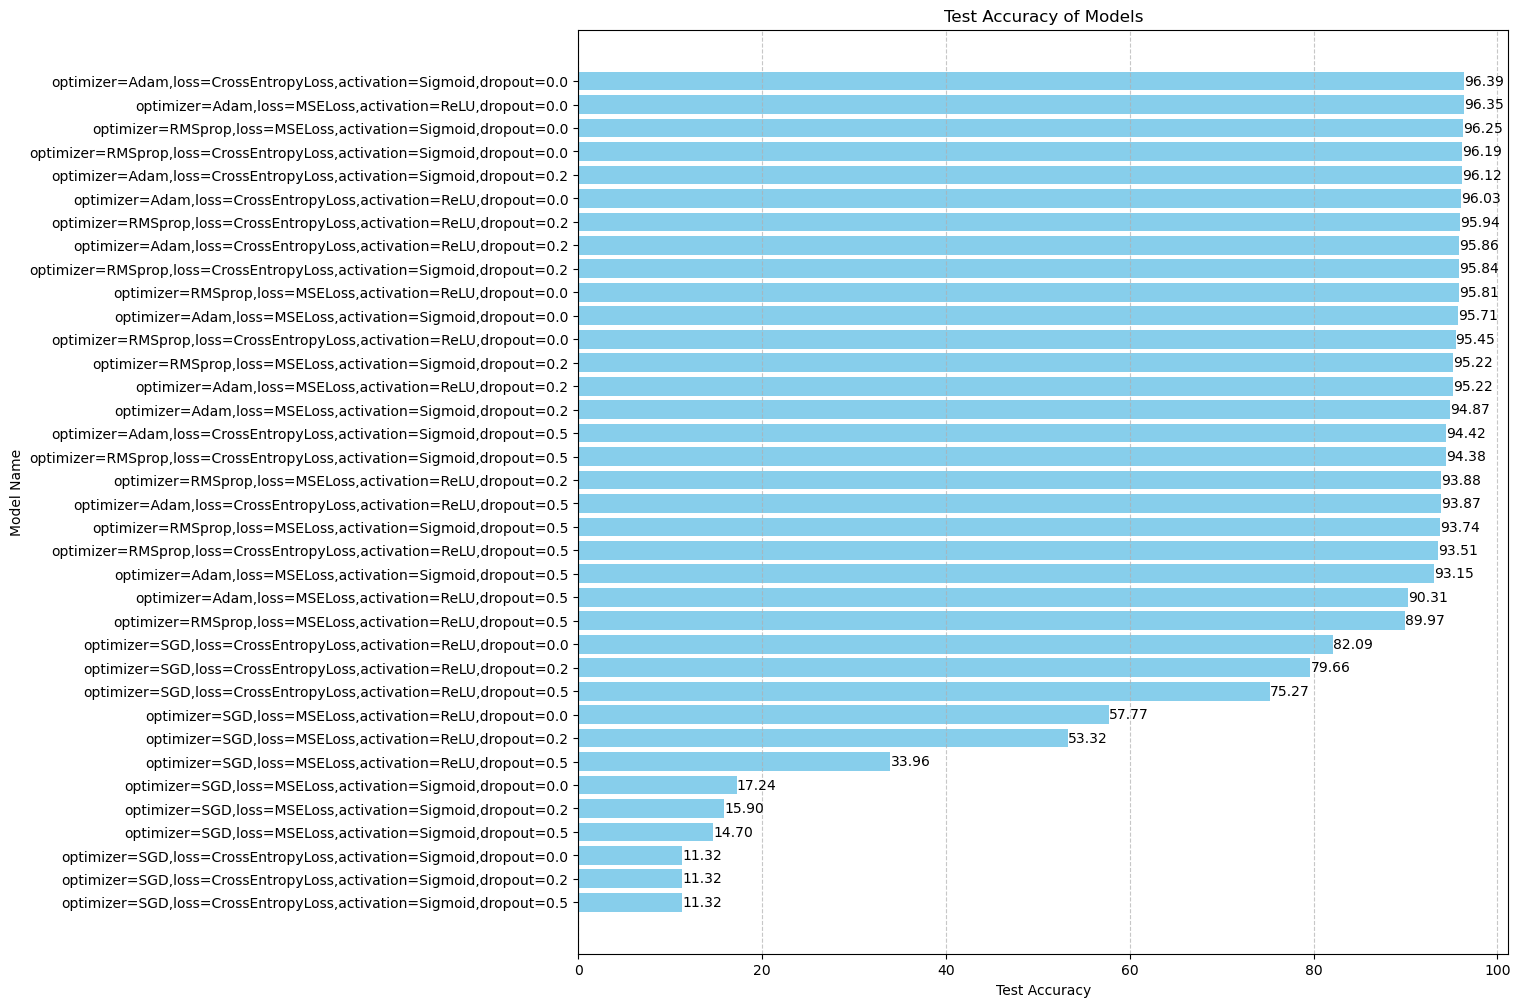

In [16]:
"""
Sort DataFrame by Test_Accuracy in increasing order and plot it for different models
"""

df_sorted = result_df.sort_values(by='test_accuracy')

plt.figure(figsize=(12, 12))
bars = plt.barh(df_sorted['name'], df_sorted['test_accuracy'], color='skyblue')
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}',
             va='center', ha='left', fontsize=10)
plt.xlabel('Test Accuracy')
plt.ylabel('Model Name')
plt.title('Test Accuracy of Models')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

## Observations -

* We can see that most of hyper parameters are working as great and have accuracy very close to each other.
* but the some combinations are not working as expected, but SGD optmizer is not working good with Sigmoid Activation function.
* Increaseing value of dropout more than 0.2 is not helping.
* Adam Optimizer and RMS Prop is working consistently good, but SGD (Schtocastic Gradient Descent) is not working well, as we are training our models for 5 epochs, so increasing the epochs will also increase the model performance. We can see the below results which verifies the claim.


In [19]:
optimizers = [optim.SGD]
loss_functions = [nn.MSELoss(), nn.CrossEntropyLoss(), ]
dropouts = [0.2]
activation_functions = [nn.Sigmoid()]

result = {"optimizer":[], "loss": [], "dropout":[], "activation": [],
          "training_loss": [], "train_accuracy": [], "test_accuracy": [], "name": []}

for optimizer in optimizers:
    for loss_function in loss_functions:
        for dropout in dropouts:
            for activation_function in activation_functions:

                result["optimizer"].append(optimizer.__name__)
                result["loss"].append(loss_function.__class__.__name__)
                result["activation"].append(activation_function.__class__.__name__)
                result["dropout"].append(dropout)

                name = []
                for key in ["optimizer", "loss", "activation", "dropout"]:
                    name.append(f'{key}={result[key][-1]}')

                result["name"].append(",".join(name))

                print(f'''\n\tTraining {result["name"][-1]}''')

                model = MLP_Flex(activation_function=activation_function, dropout=dropout)
                model, training_loss, train_accuracy = training(train_loader = train_loader,
                                                                num_epochs = 20,
                                                                model = model,
                                                                criterion = loss_function,
                                                                optimizer = optimizer(model.parameters(), lr=0.001),
                                                                verbose = 2)
                
                result["training_loss"].append(training_loss)
                result["train_accuracy"].append(train_accuracy)
                
                test_accuracy, predictions = evaluation(model=model, test_data=test_loader)
                print(f'Accuracy on Test Data: {test_accuracy: .5}%')
                result["test_accuracy"].append(test_accuracy)


	Training optimizer=SGD,loss=MSELoss,activation=Sigmoid,dropout=0.2
Finished Training with loss = 0.940018
Accuracy on Train Data  = 19.263%
Accuracy on Test Data:  19.427%

	Training optimizer=SGD,loss=CrossEntropyLoss,activation=Sigmoid,dropout=0.2
Finished Training with loss = 21.1863
Accuracy on Train Data  = 29.078%
Accuracy on Test Data:  29.65%
